# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Questions to be answered**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.shape

(124, 3)

In [8]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [3]:
print(f'Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [10]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [11]:
print(df_tesla.head()) # On the first of each month -> monthly periodicity

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368


### Unemployment Data

In [13]:
df_unemployment.shape

(181, 3)

In [14]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [16]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [17]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [18]:
df_unemployment.head() # monthly periodicity

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


### Bitcoin

In [19]:
df_btc_search.shape

(73, 2)

In [20]:
df_btc_price.shape

(2204, 3)

In [21]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [22]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [23]:
print(f'largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}')

largest BTC News Search: 100


In [24]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [25]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [26]:
df_btc_search.head() #monthly

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [27]:
df_btc_price.head( #daily

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


# Data Cleaning

### Check for Missing Values

**Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there**?

In [4]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [32]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [33]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [36]:
df_btc_price[df_btc_price["CLOSE"].isna()]

,DATE,CLOSE,VOLUME


In [35]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [3]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])

In [6]:
print(type(df_tesla["MONTH"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])

In [46]:
print(type(df_unemployment["MONTH"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])

In [48]:
print(type(df_btc_search["MONTH"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])

In [9]:
print(type(df_btc_price["DATE"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [15]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()
print(df_btc_monthly.shape)


(73, 2)


In [10]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [11]:
df_btc_monthly.tail()

,CLOSE,VOLUME
DATE,,
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10
2020-08-31,11680.820313,2.228593e+10
2020-09-30,10912.536133,2.122653e+10


In [12]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [12]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')


### Tesla Stock Price v.s. Search Volume

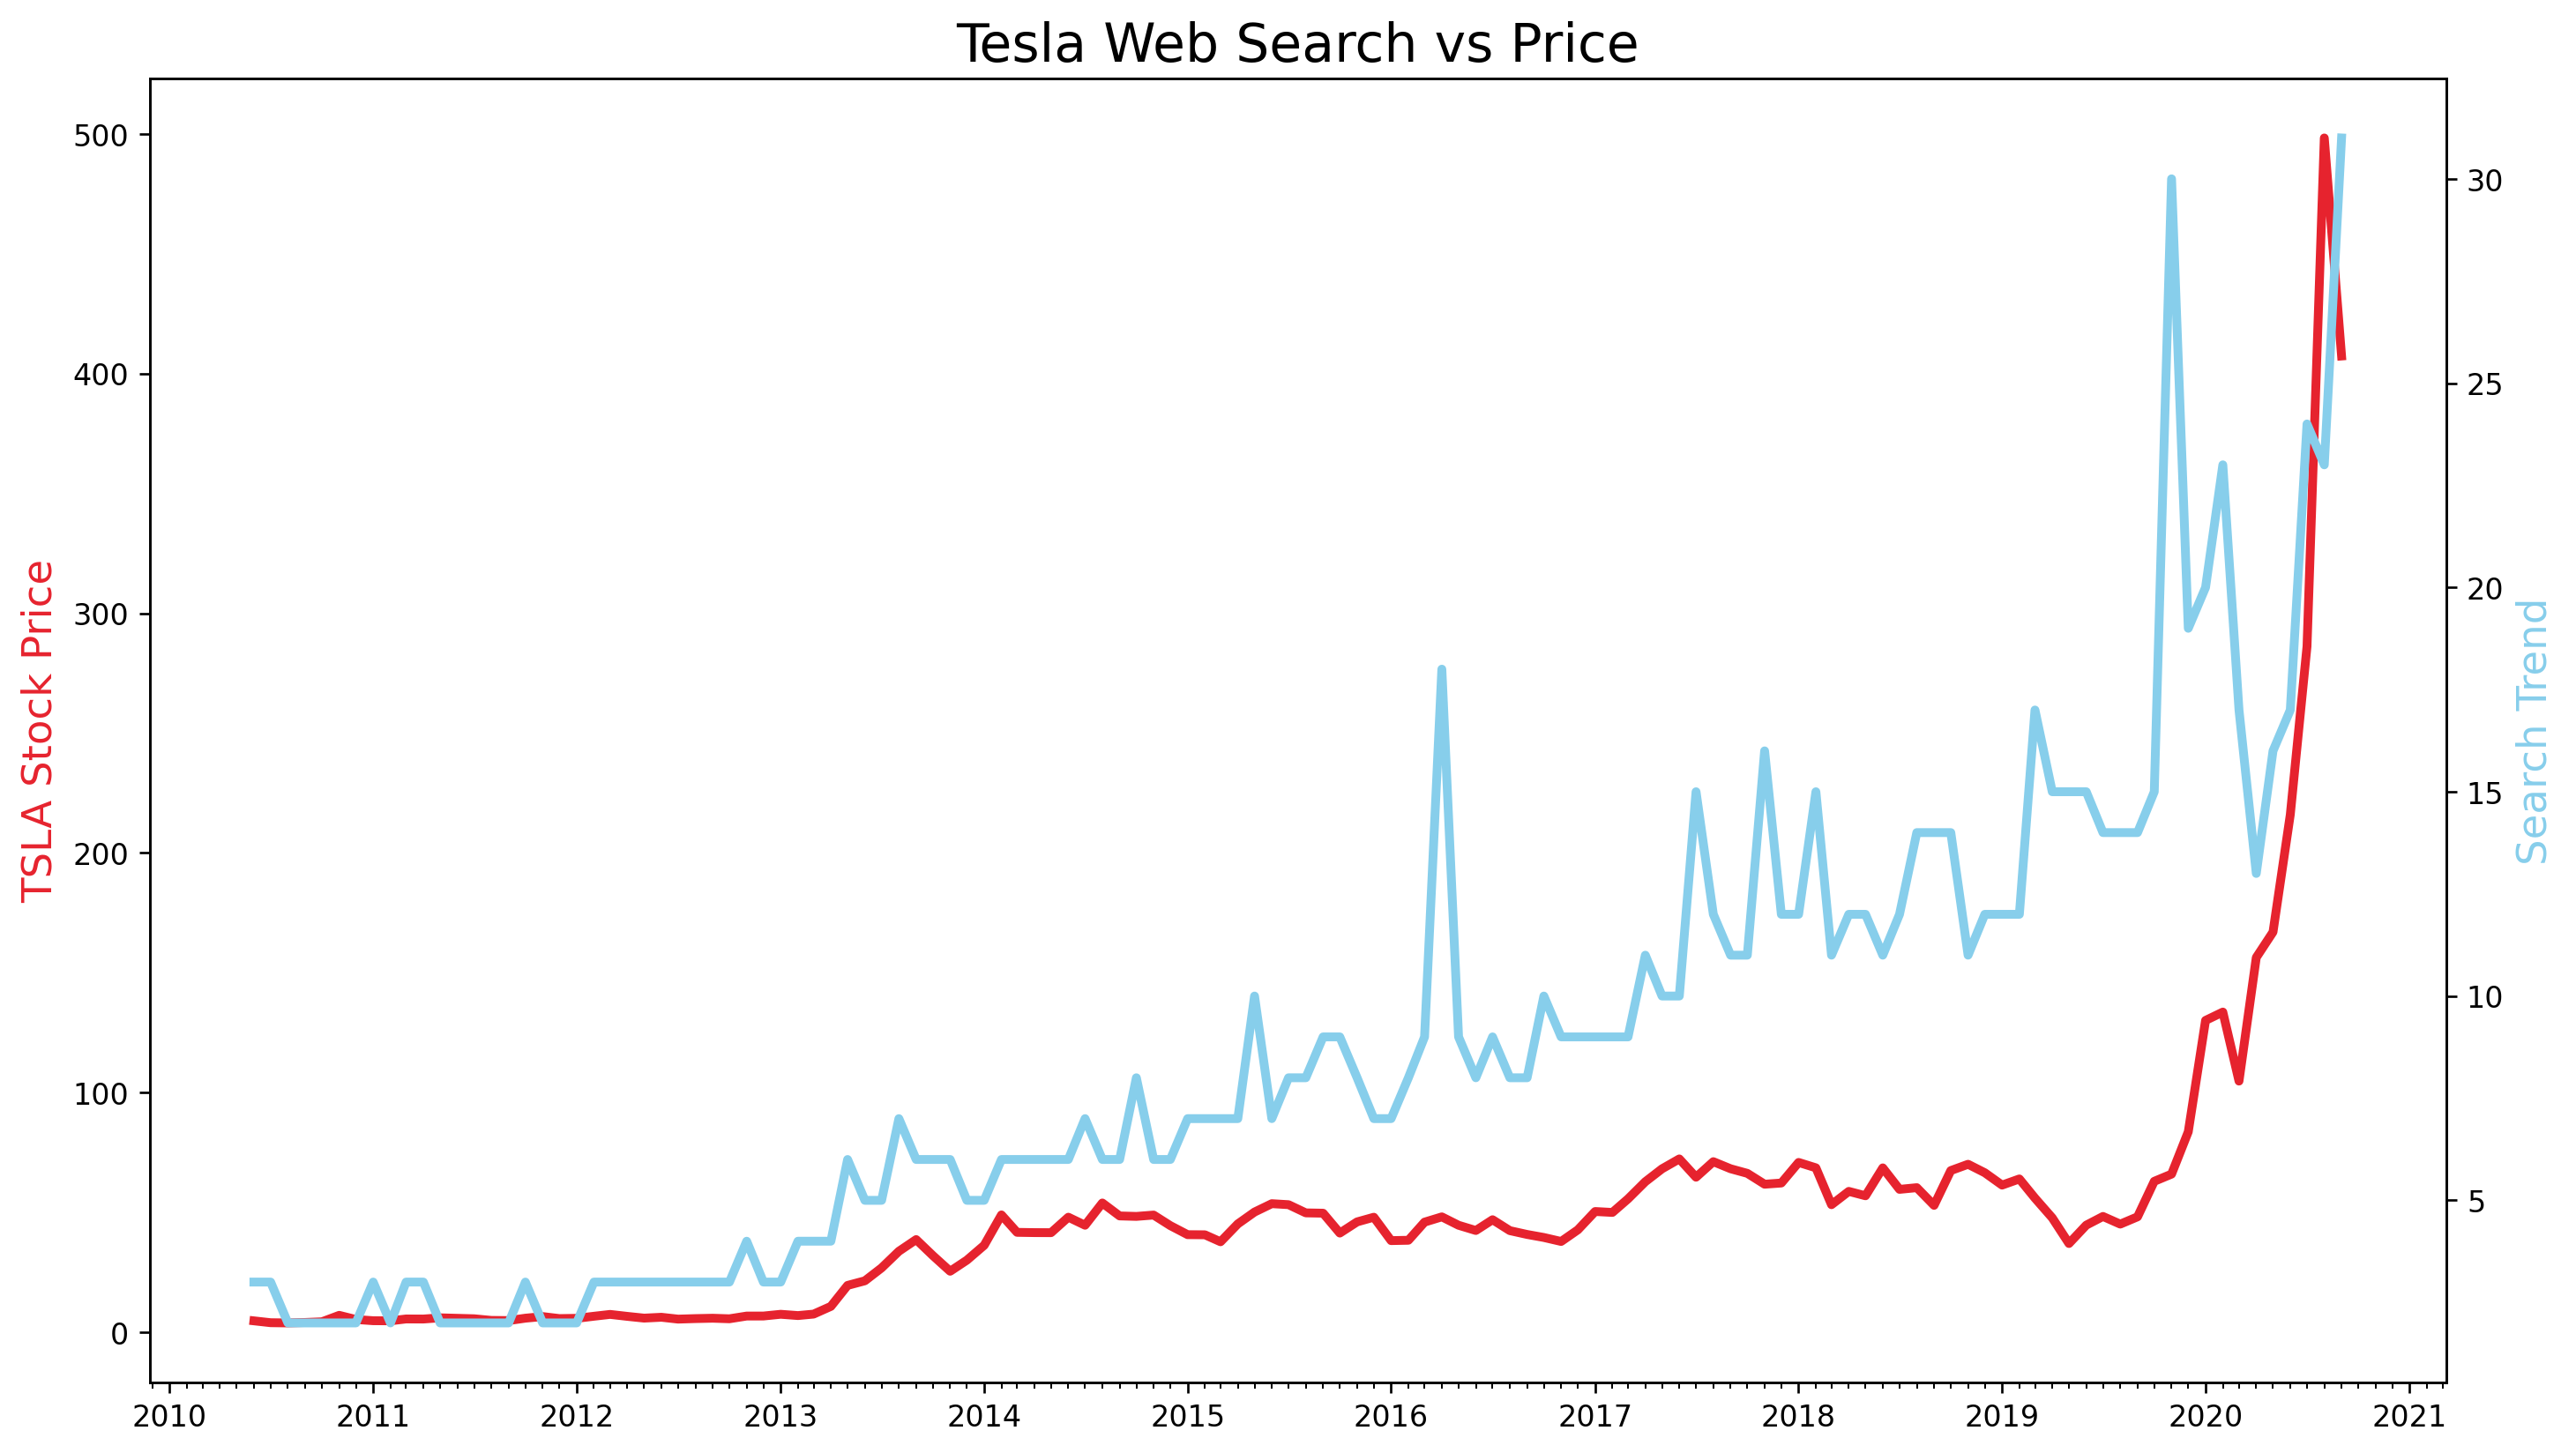

In [66]:
# increases size and resolution
plt.figure(figsize=(14, 8), dpi=240)
plt.title("Tesla Web Search vs Price",fontsize=18)


ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

plt.xticks(fontsize=14,rotation=45)

ax1.set_ylabel('TSLA Stock Price', fontsize=14, color='#E6232E')
ax2.set_ylabel('Search Trend', fontsize=14, color='skyblue')

# Set the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)



plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

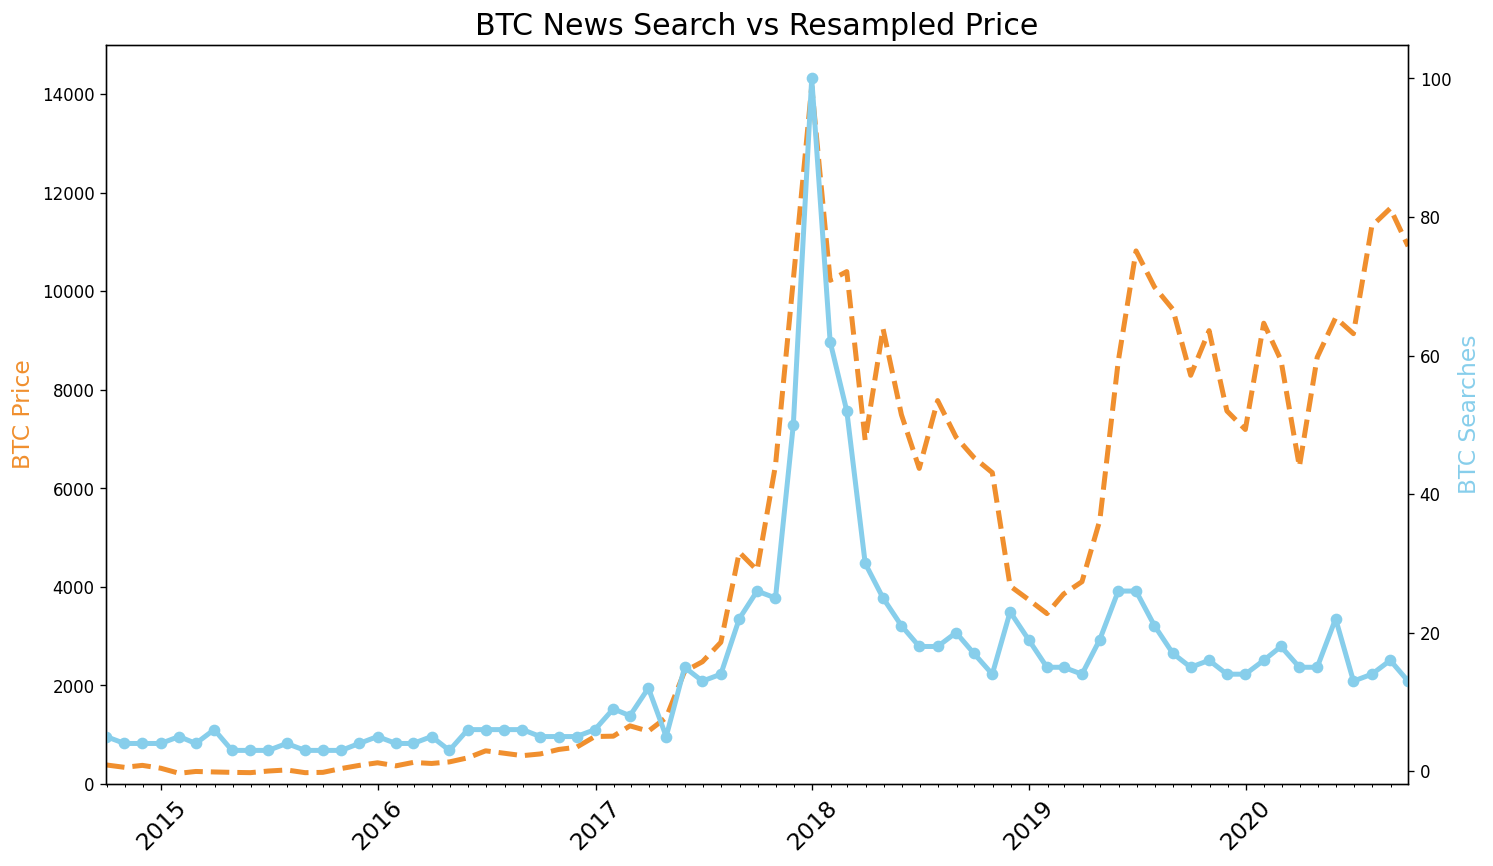

In [32]:
# increases size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title("BTC News Search vs Resampled Price",fontsize=18)
plt.xticks(fontsize=14,rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', fontsize=14, color='#F08F2E')
ax2.set_ylabel('BTC Searches', fontsize=14, color='skyblue')

# Set the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

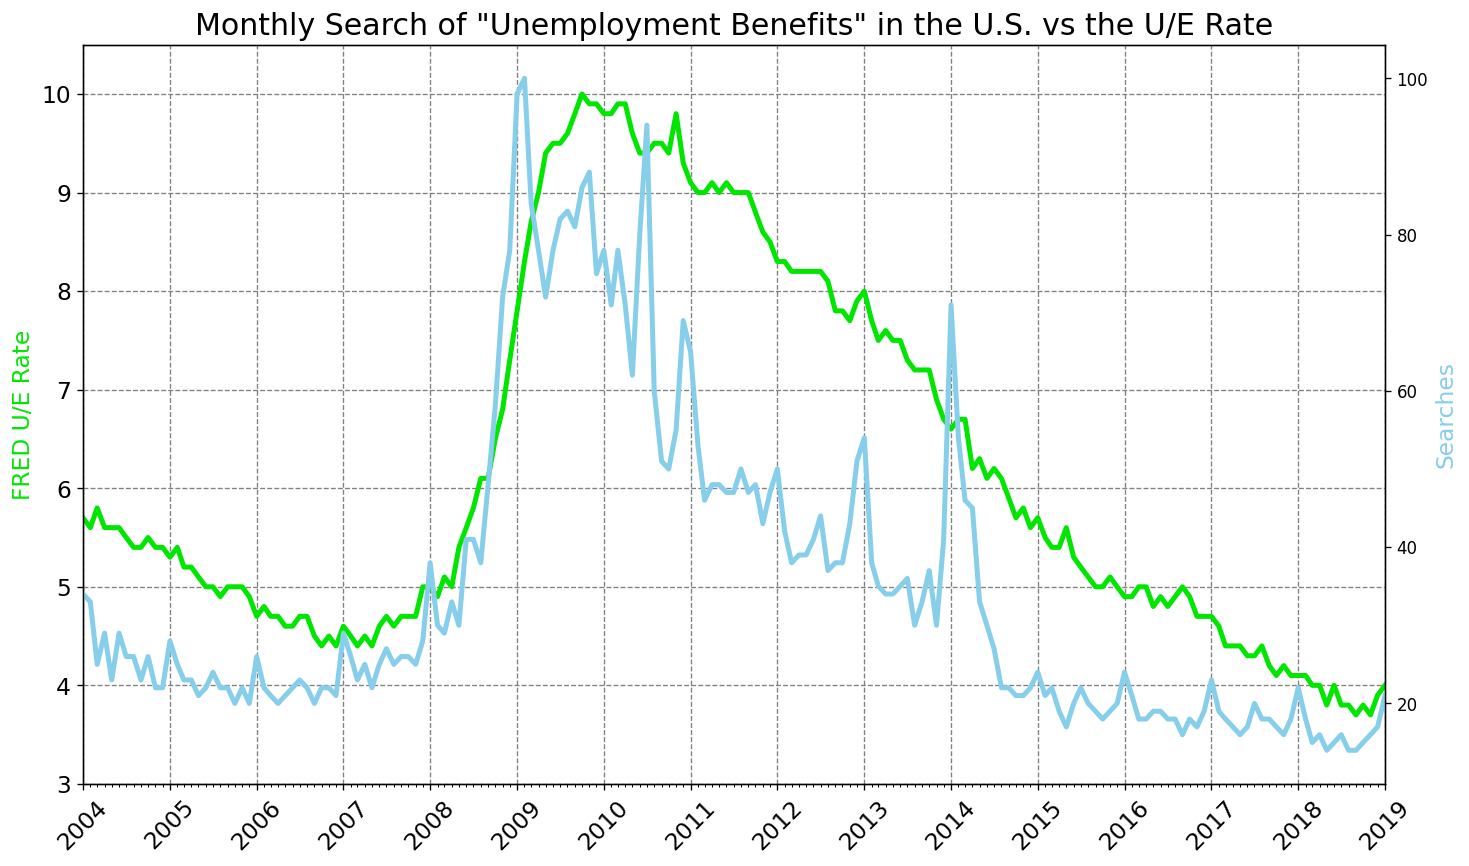

In [43]:
# increases size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', fontsize=14, color='#00e600')
ax2.set_ylabel('Searches', fontsize=14, color='skyblue')

# Set the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#00e600', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


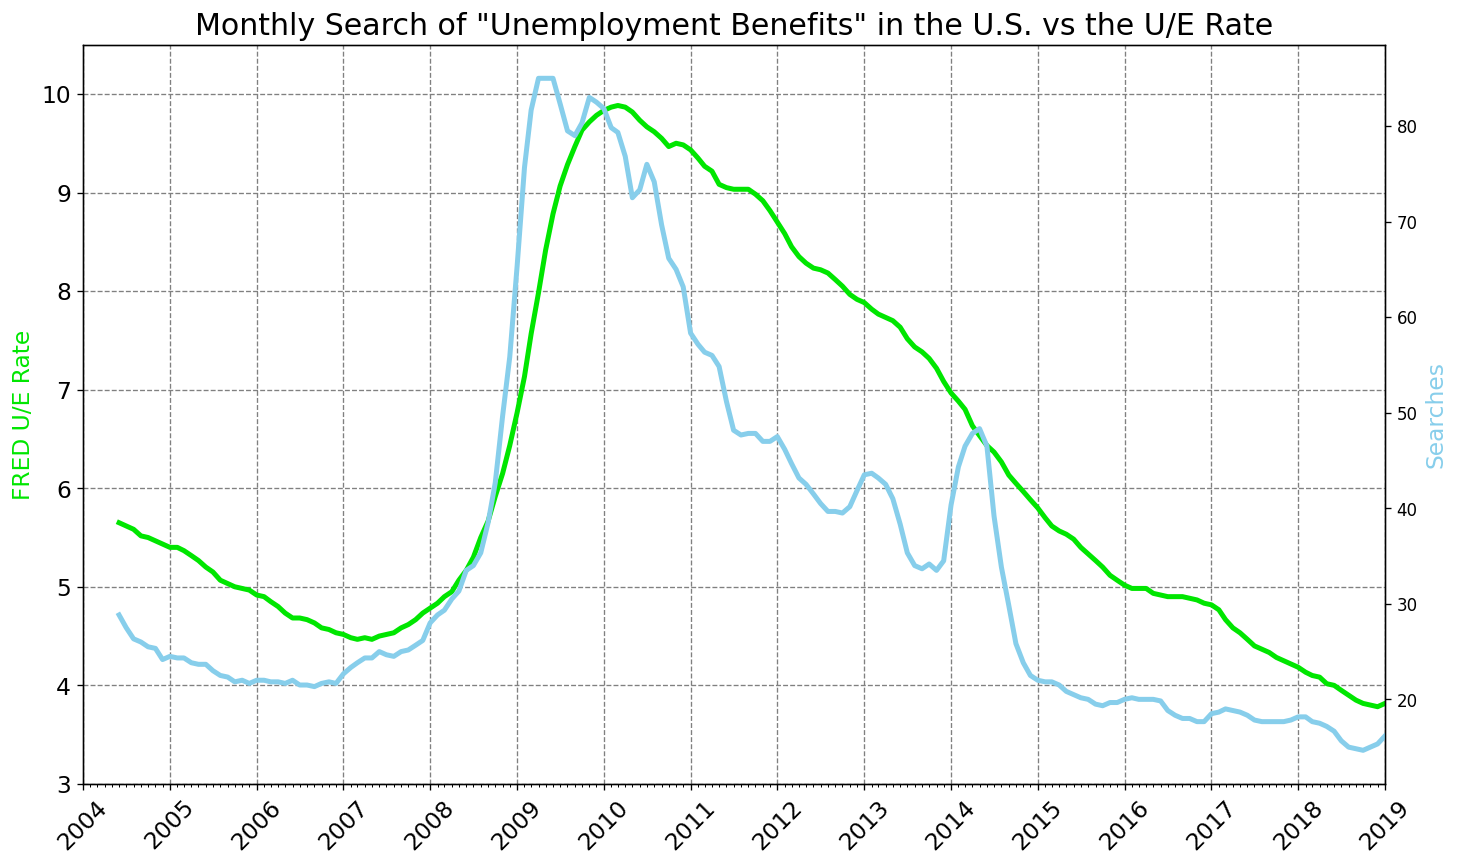

In [50]:
# increases size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', fontsize=14, color='#00e600')
ax2.set_ylabel('Searches', fontsize=14, color='skyblue')

# Set the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='#00e600', linewidth=3)
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()



roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

### Including 2020 in Unemployment Charts

In [53]:
df_ue = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [55]:
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

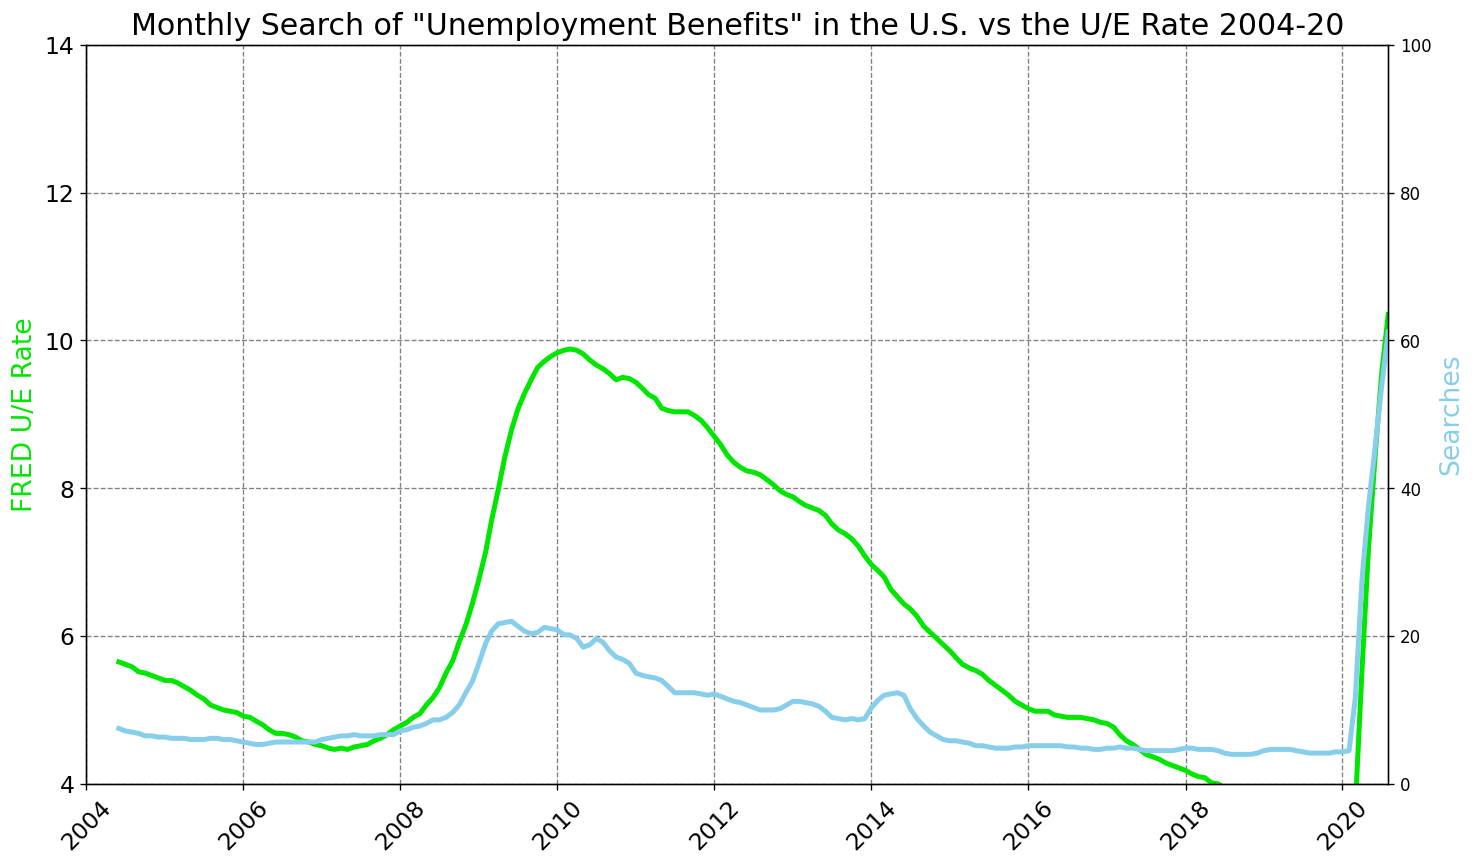

In [62]:
# increases size and resolution
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate 2004-20',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=45)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', fontsize=16, color='#00e600')
ax2.set_ylabel('Searches', fontsize=16, color='skyblue')

ax1.set_xlim([df_ue.MONTH.min(), df_ue.MONTH.max()])
ax1.set_ylim(bottom=4, top=14)
ax2.set_ylim(bottom=0, top=100)

roll_df = df_ue[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()


ax1.grid(color='grey', linestyle='--')

ax1.plot(df_ue.MONTH, roll_df.UNRATE, color='#00e600', linewidth=3)
ax2.plot(df_ue.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()